In [97]:
#Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
#Load Data file
#This is the file contaning all K9 Toss and Fetch data from the beginning of the leauge till end of 2019
fname = 'league scores full master 1-14-20.xlsx'
allseasons = pd.read_excel(fname,sheet_name='All Time by SEASONS', header=6)

In [69]:
#Handle missing last names
allseasons['Last '] = allseasons['Last '].fillna('')

#Create new column with full name
firstn = allseasons['First '].to_numpy()
lastn = allseasons['Last '].to_numpy()
fulln = firstn +' '+ lastn
allseasons['Full_Name']= pd.DataFrame(fulln)

In [83]:
def get_databyseason(season, data):
    '''This function can be used to find the total number of unique players in a given season
        It takes the requested  season in form 001-YYYY-SEASON and the dataFrame containing 
        the season information.
        This function returns a dataframe containg all info for the given season'''
    
    dfseason = data[data['Season']==season]
    return dfseason
    

In [90]:
dseason='001-2015-FALL'
singleseason = get_databyseason(dseason, allseasons)


In [91]:
def count_players(data):
    '''This function counts the number of unique players calculated by unique player names.
       This function takes a pandas dataframe  and returns the total number of unique players'''
    players = data.Full_Name.unique()
    size = np.size(players)
    return size
    

In [92]:
print(count_players(singleseason))

50


In [96]:
#array containing all season strings
seasons = allseasons.Season.unique()
#array containing count of seasons
p_count =[]
for s in seasons:
    data = get_databyseason(s, allseasons)
    p_count.append(count_players(data))
print(p_count)
    

[50, 113, 118, 106, 164, 432, 398, 546, 633, 472, 874, 900, 964, 1161, 820, 1478, 1523, 1441, 1333]


In [101]:
%matplotlib inline
season_num = np.arange(1,20)
print (season_num)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


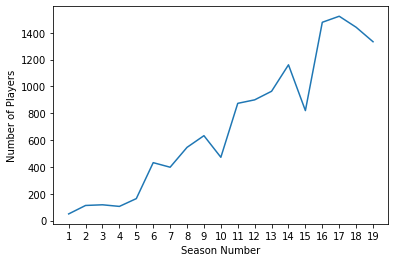

In [104]:
plt.plot(season_num, p_count)
xi = season_num
plt.xlabel('Season Number')
plt.ylabel('Number of Players')
plt.xticks(xi, season_num)
plt.show()